In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Collecting the Data

In [109]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

data.sample(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E67,S
696,697,0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
191,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
514,515,0,3,"Coleff, Mr. Satio",male,24.0,0,0,349209,7.4958,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
267,268,1,3,"Persson, Mr. Ernst Ulrik",male,25.0,1,0,347083,7.7750,NaN,S
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q
608,609,1,2,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0,1,2,SC/Paris 2123,41.5792,NaN,C
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9000,NaN,S


In [110]:
# deleting irrelavant columns

data = data.drop(columns = ['PassengerId','Name','Ticket','Fare'])
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,22.0,1,0,NaN,S
1,1,1,female,38.0,1,0,C85,C
2,1,3,female,26.0,0,0,NaN,S
3,1,1,female,35.0,1,0,C123,S
4,0,3,male,35.0,0,0,NaN,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,NaN,S
887,1,1,female,19.0,0,0,B42,S
888,0,3,female,NaN,1,2,NaN,S
889,1,1,male,26.0,0,0,C148,C


In [111]:
# checking the shape of the data as well as the null values
print(data.shape)
Missing_values = data.isnull().sum().sort_values(ascending =False)
missing_data = pd.DataFrame({'Missing Values':Missing_values,'Percent': Missing_values/data.shape[0]*100})

missing_data

(891, 8)


,Missing Values,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Survived,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


Treating Null Values

Cabin - Cabin have more than 50% of the data missing so we will go ahead and delete that column

Embarked - it has only 2 data missing and it is categorcial data so we will replace it using mode

In [112]:
data['Embarked'].value_counts()

#filling Embarked NA with mode
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Deleting cabin class
data = data.drop(columns='Cabin')
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

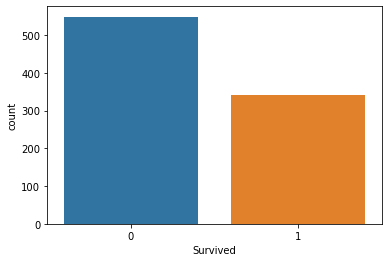

In [113]:
#checking the distribution of age columns
print(data['Survived'].value_counts())
sns.countplot(x='Survived',data=data)

In [114]:
# checking the mean age of passenger who couldnt survived
print('Avaerage age of passenger who couldnt survived---',data['Age'][data.Survived == 0].mean())
print('Avaerage age of passenger who survived---',data['Age'][data.Survived == 1].mean())
print('Avaerage age of passenger---',data['Age'].mean())

Avaerage age of passenger who couldnt survived--- 30.62617924528302
Avaerage age of passenger who survived--- 28.343689655172415
Avaerage age of passenger--- 29.69911764705882


it looks like the average of suvived passenger is 28 years and that who couldnt survive is 30 years  so we will fill the missing values with mean of total passenger accordingly i.e 29

In [117]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

All the missing values has been dealt with now, checking the structure of the data

In [119]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,13.002015,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


we can see the skewness in the following columns :
Age, SibSp, Parch

we will further identify it using the distribution of data

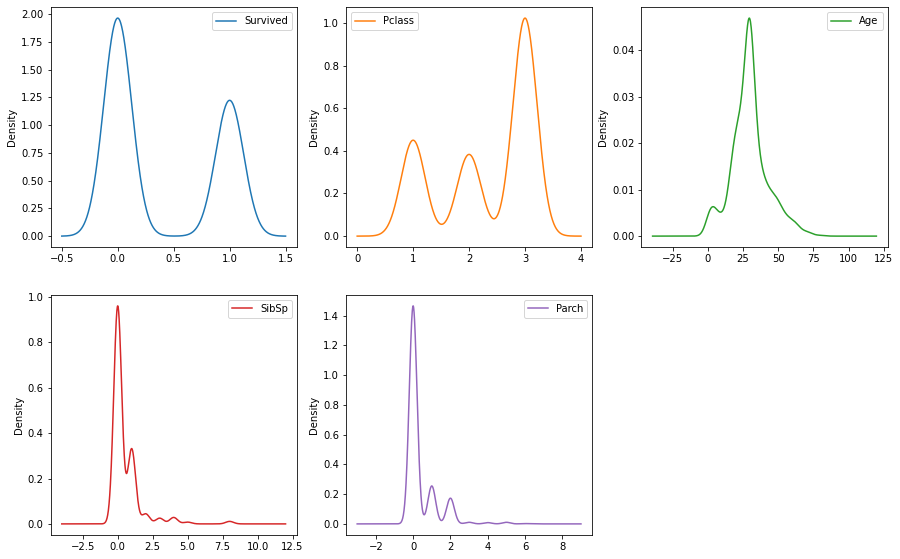

In [125]:
data.plot(kind='density',sharex=False,subplots=True,layout=(3,3),figsize=(15,15))
plt.show()

In [136]:
data.corr()

,Survived,Pclass,Age,SibSp,Parch
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000


In [138]:
# converting string into number using label encoder
from sklearn.preprocessing import LabelEncoder


data['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data['Embarked'] = LabelEncoder().fit_transform(data['Embarked'])

In [140]:
data['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

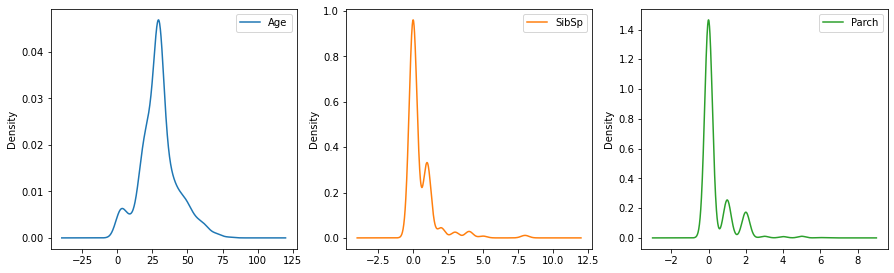

In [159]:
# vizulaize the following columns  for skewness/ outliers
data[['Age','SibSp','Parch']].plot(kind='density',sharex=False,subplots=True,layout=(3,3),figsize=(15,15))
plt.show()

In [162]:
# removing the outliers using zscore
from scipy.stats import zscore

z_score = np.abs(zscore(data[['Age','SibSp','Parch']]))

data_1 = data[(z_score<3).all(axis=1)]

In [163]:
data_1

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.000000,1,0,2
1,1,1,0,38.000000,1,0,0
2,1,3,0,26.000000,0,0,2
3,1,1,0,35.000000,1,0,2
4,0,3,1,35.000000,0,0,2
...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,2
887,1,1,0,19.000000,0,0,2
888,0,3,0,29.699118,1,2,2
889,1,1,1,26.000000,0,0,0


in total 52 datapoints have been removed by the removing the outlier from the above age, Sibsp and parch column 

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

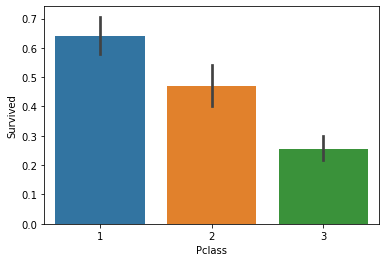

In [178]:
sns.barplot(x='Pclass',y='Survived',data=data_1)

here we can see that  person in class 3 have less chances of survival as compared to class 2 and class 1

In [180]:
# separating label and features
x = data.drop(columns='Survived')
y= data['Survived']

<AxesSubplot:>

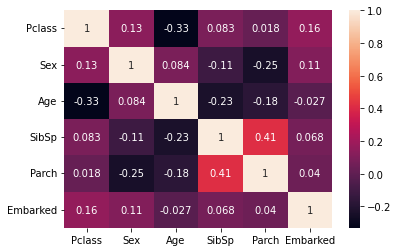

In [186]:
#checking for the multicolinearity for the features using heatmap

sns.heatmap(x.corr(), annot=True)

No sign of multicolinearity is found in feature label

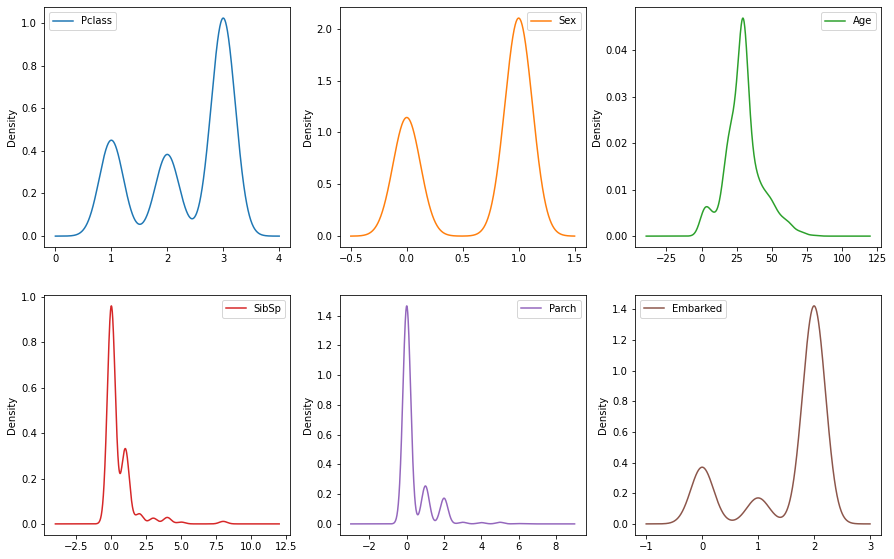

In [187]:
# checking for the skewness in the dataset
x.plot(kind='density',sharex=False,subplots=True,layout=(3,3),figsize=(15,15))
plt.show()

Skewness is found in Age Sibsp and parch column so we will remove it using square root transformation

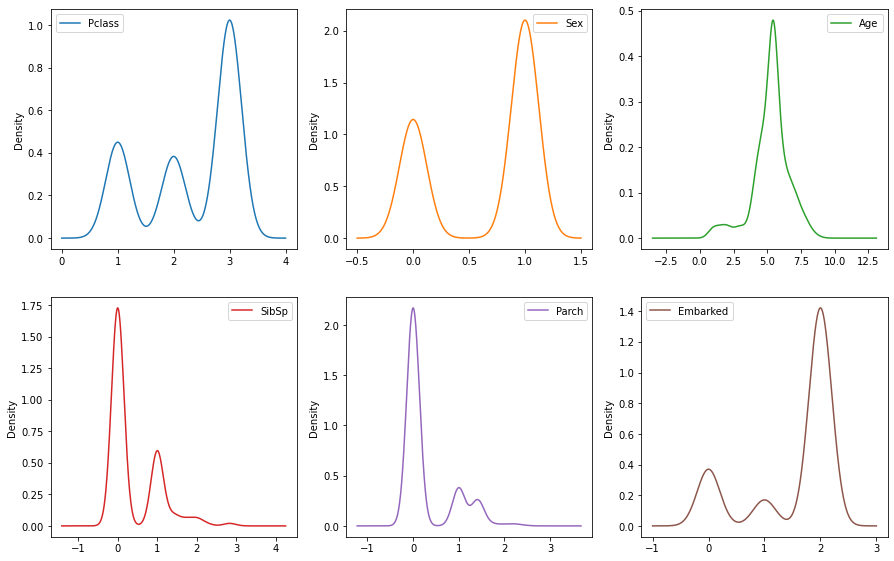

In [193]:
from
x.Age = np.sqrt(x.Age)
x.SibSp = np.sqrt(x.SibSp)
x.Parch = np.sqrt(x.Parch)

x.plot(kind='density',sharex=False,subplots=True,layout=(3,3),figsize=(15,15))
plt.show()

In [194]:
x.skew()

Pclass     -0.630548
Sex        -0.618921
Age        -0.825444
SibSp       1.436526
Parch       1.529799
Embarked   -1.264823
dtype: float64

As we can see the sqrt root transformation has removed the skewness from Age column however it was nt able to remove skewness from Sibsp and Parch so we will use power transofrm to remove the skewness

In [203]:
from sklearn.preprocessing import power_transform

x_trans = power_transform(x)

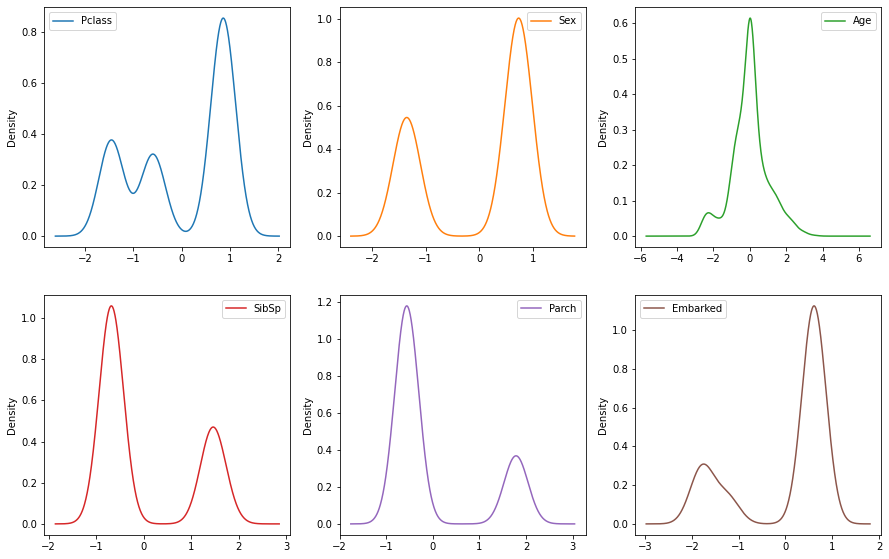

In [206]:
x_trans  = pd.DataFrame(x_trans,columns=x.columns)
x_trans.plot(kind='density',sharex=False,subplots=True,layout=(3,3),figsize=(15,15))
plt.show()

# Scaling the feature

In [208]:
from sklearn.preprocessing import StandardScaler

x_scaled = StandardScaler().fit_transform(x_trans)

# Training the model

We will use 4 classification model to predict the data

- logisticregression
- knn
- decisiontree
- Random forest

In [405]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, auc
# best the best random state for Logistic regrssion model
ri = 0
acc = 0

for i in range(0,500):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    lm = LogisticRegression()
    lm.fit(x_train,y_train)
    y_pred = lm.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = lm.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.8044692737430168 random state - 0
Accurancy Score -  0.8156424581005587 random state - 4
Accurancy Score -  0.8603351955307262 random state - 6
Accurancy Score -  0.8659217877094972 random state - 396


In [231]:
# best the best random state for Decision tree model
from sklearn.tree import DecisionTreeClassifier

ri = 0
acc = 0

for i in range(0,500):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = dt.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.7932960893854749 random state - 0
Accurancy Score -  0.8212290502793296 random state - 4
Accurancy Score -  0.8435754189944135 random state - 6
Accurancy Score -  0.8715083798882681 random state - 45


In [232]:
# best the best random state for Logistic regrssion model
from sklearn.ensemble import RandomForestClassifier
ri = 0
acc = 0

for i in range(0,500):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = rf.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.8212290502793296 random state - 0
Accurancy Score -  0.8324022346368715 random state - 4
Accurancy Score -  0.8435754189944135 random state - 6
Accurancy Score -  0.8659217877094972 random state - 18
Accurancy Score -  0.88268156424581 random state - 74


In [228]:
# best the best random state for Logistic regrssion model
from sklearn.neighbors import KNeighborsClassifier
ri = 0
acc = 0

for i in range(0,500):
    x_train, x_test, y_train, y_test = train_test_split(x_trans,y,train_size=.8,random_state=i)
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    pacc = accuracy_score(y_test,y_pred)
    pscore = knn.score(x_test,y_test)
    
    if pacc > acc:
        acc = pacc
        ri = i
        score = pscore
        print('Accurancy Score - ',acc,'random state -',ri)

Accurancy Score -  0.7877094972067039 random state - 0
Accurancy Score -  0.8100558659217877 random state - 3
Accurancy Score -  0.8156424581005587 random state - 4
Accurancy Score -  0.8212290502793296 random state - 10
Accurancy Score -  0.8324022346368715 random state - 11
Accurancy Score -  0.8547486033519553 random state - 19
Accurancy Score -  0.8603351955307262 random state - 138


we are getting better accuracy score from Random forest so we will use this model

In [288]:
# we got best result from random forest classifier we will use that result
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,train_size=.8,random_state=74)
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
pacc = accuracy_score(y_test,y_pred)
pscore = rf.score(x_test,y_test)

print('Accuracy Score ---',accuracy_score(y_test,y_pred)*100,'%')
print('\n-------- Classification Report --------\n',classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score --- 88.26815642458101 %

-------- Classification Report --------
               precision    recall  f1-score   support

           0       0.93      0.88      0.90       112
           1       0.82      0.88      0.85        67

    accuracy                           0.88       179
   macro avg       0.87      0.88      0.88       179
weighted avg       0.89      0.88      0.88       179

[[99 13]
 [ 8 59]]


# Hyper Parameter tuning

In [298]:
from sklearn.model_selection import GridSearchCV
RandomForestClassifier()
param = {'criterion':['gini','entropy'],'min_samples_leaf': range(1,5),'max_depth':range(1,10)}

grd = GridSearchCV(rf, param_grid=param)

grd.fit(x_train, y_train)

print(grd.best_params_)

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 4}


In [398]:
rf = RandomForestClassifier(n_estimators=100,criterion='entropy', max_depth=20, min_samples_leaf=2)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
accuracy_score(y_pred,y_test)

0.8938547486033519

By using Hyperparameter tuning we are able to imporve 2% accuracy score

In [ ]:
#ROC AUC  CUr

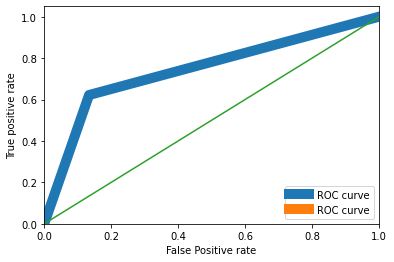

In [407]:
fpr,tpr,th = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)
plt.plot(fpr,tpr,roc_auc,lw=10,label='ROC curve' % roc_auc)
plt.plot([0,1],[0,1])
plt.xlim([0.0,1])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='lower right')